In [2]:
import numpy as np
import scipy.sparse as sp
import unittest
from SimPEG import Mesh, Maps, Models, Utils, PF, Regularization, Directives
from SimPEG import InvProblem, Optimization, Inversion, DataMisfit
import inspect
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from SimPEG.Utils import mkvc

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



In [6]:
h = np.ones(32)*5
mesh = Mesh.TreeMesh([h,h,h], )


xLoc = np.c_[35.,40.,55.]
# xLoc = np.r_[xLoc,np.c_[75,40.,80.]]

mesh.x0 = [-40.,-30.,-50.]


In [7]:
maxLevel = int(np.log2(mesh.hx.shape[0]))
print(maxLevel)

mesh.insert_cells(xLoc, np.r_[maxLevel], finalize=False)


5


In [8]:
nCpad=np.r_[1, 1, 1]

stencil = np.r_[
            np.ones(nCpad[0]),
            np.ones(nCpad[1])*2,
            np.ones(nCpad[2])*3
        ]

# Reflect in the opposite direction
vec = np.r_[stencil[::-1],1, stencil]
vecX, vecY, vecZ = np.meshgrid(vec,vec,vec)
gridLevel = np.maximum(np.maximum(vecX,
                       vecY), vecZ)

# Grid the coordinates
vec = np.r_[-stencil[::-1],0, stencil]
vecX, vecY, vecZ = np.meshgrid(vec,vec,vec)
offset = np.c_[mkvc(np.sign(vecX)*2**np.abs(vecX)* mesh.hx.min()),
               mkvc(np.sign(vecY)*2**np.abs(vecY)* mesh.hx.min()),
               mkvc(np.sign(vecZ)*2**np.abs(vecZ)* mesh.hx.min())
              ]

# Replicate the point locations in each offseted grid points
newLoc = np.kron(xLoc, np.ones((offset.shape[0],1))) + np.kron(np.ones((xLoc.shape[0],1)), offset )

mesh.insert_cells(newLoc, mkvc(maxLevel-gridLevel+1))
# vec = vec.reshape((1,vec.shape[0]))

# vec2D = np.kron( vec, np.ones((2,1)) )
# grid = Utils.kron3( vec2D, Utils.speye(vec.shape[1]), Utils.speye(vec.shape[1]))


In [281]:
np.savetxt('NewLocs.dat', newLoc)

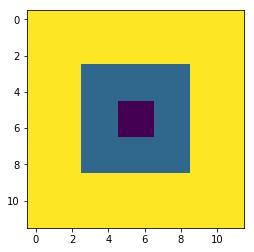

In [278]:


gridXYZ = 2**grid * mesh.hx.min()

# Replicate the point locations in each offseted grid points


plt.imshow(gridXYZ[:,:,5])
plt.show()

In [9]:
# mesh.finalize()


Mesh.TreeMesh.writeUBC(mesh, 'OctreeTest.msh',
                       models={'Actv.mod': np.ones(mesh.nC)})